# Viscosity Prediction using SVR

## Flow
* Discuss data, take the statistics
* Get performance of mean predictor, why is it good?
* Get the performance of SVR,
* Check the hyperparameter optimisation
* show the decision boundary of SVR for different parameter combination
* compare performance with mean estimator
* Compare grid serach with PSO and genetic algorithm


In [29]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR as SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

In [6]:
#check the directorry for files 
! ls

viscosityData.xlsx  viscosityPred.ipynb


In [32]:
#import the data 

dfData = pd.read_excel("viscosityData.xlsx")

dfData.head()

,Eta (cP),T2gm (ms),T (K),TE (ms)
0,2242.150000,2.020000,303.15,0.10
1,30724.077831,0.988897,312.15,0.24
2,6217.946533,1.467505,327.15,0.24
3,200.533942,6.199510,376.15,0.24
4,88.627484,10.880354,394.15,0.24


In [33]:
#get the statistics
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Eta (cP)   282 non-null    float64
 1   T2gm (ms)  282 non-null    float64
 2   T (K)      282 non-null    float64
 3   TE (ms)    282 non-null    float64
dtypes: float64(4)
memory usage: 8.9 KB


In [35]:
#get the statisstics
dfData.describe()

,Eta (cP),T2gm (ms),T (K),TE (ms)
count,282.000000,282.000000,282.000000,282.000000
mean,12978.518683,59.386988,337.433688,0.204113
std,61373.723431,165.578141,45.158531,0.077543
min,0.871718,0.230000,299.150000,0.100000
25%,33.894908,1.790493,303.150000,0.100000
50%,416.887570,5.160508,323.150000,0.240000
75%,3509.831760,30.875000,361.900000,0.240000
max,867634.812287,1239.900000,468.150000,0.300000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2c8d2e190>,
      dtype=object)

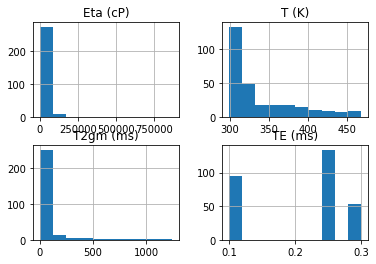

In [40]:
#get the hsitogram of variables
dfData.hist()

In [15]:
#separate predictors and target
X = dfData.iloc[:,1:]
y = dfData.iloc[:,:1]

print(X.head(),y.head())

   T2gm (ms)   T (K)  TE (ms)
0   2.020000  303.15     0.10
1   0.988897  312.15     0.24
2   1.467505  327.15     0.24
3   6.199510  376.15     0.24
4  10.880354  394.15     0.24        Eta (cP)
0   2242.150000
1  30724.077831
2   6217.946533
3    200.533942
4     88.627484


In [24]:
#separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train:{X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train:(197, 3), y_train: (197, 1), X_test: (85, 3), y_test: (85, 1)


In [25]:
#normalise the train data and test data
stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(X_train)
X_test = stdScaler.transform(X_test)

In [27]:
#train the svr model
svrReg = SVR(C= 1.0, epsilon= 0.8 )
svrReg.fit(X_train, y_train.values.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.8, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
#obtain the model performance for training data
ypred_tr = svrReg.predict(X_train)

RMSEtr = MSE(y_train, ypred_tr, squared=False)

print("The training performance is: ", RMSEtr)

The training performance is:  72471.33904130013


In [39]:
#obtain the model performance for training data
ypred_ts = svrReg.predict(X_test)

RMSEts = MSE(y_test, ypred_ts, squared=False)

print("The testing performance is: ", RMSEts)

The testing performance is:  28443.09446034357


In [ ]:
#